<center>
    <img src="https://www.clearlyrated.com/brand-logo/talent-path" width="500" alt="cognitiveclass.ai logo"  />
</center>

<h1 style="color:DarkBlue; text-align:center"> Python Pandas and Matplotlib</h1>

In [1]:
# import the packages 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

## Step one - Series

First, we want to create a `pandas` `Series` object that has length 3 and the first element is `nan` 

In [2]:
s = pd.Series([np.nan,12.03, 43.1])

In [3]:
s

0      NaN
1    12.03
2    43.10
dtype: float64

### Do a numerical operation on the Series

Multiply the series by the scalar 0.5

In [4]:
s*.5

0       NaN
1     6.015
2    21.550
dtype: float64

### Store the result in another series object

The result of the last operation wasn't stored in a variable, assign the operation to a variable called `s1`

In [5]:
s1 = s*.5

We can also add these two series! 

In [6]:
s1 + s

0       NaN
1    18.045
2    64.650
dtype: float64

## Step two -  DataFrames
Let's create a new Dataframe out of the two series we just made.

In [7]:

df = pd.concat([s,s1],axis=1)
df

,0,1
0,NaN,NaN
1,12.03,6.015
2,43.10,21.550


### Let's store the sum of the two series in a new column of our dataframe  
There are couple ways we can accomplish this, the two that we will be looking:
- Converting a series that already has been summed into a new column
- Assigning a new column directly using other columns

In [8]:
df['SeriesSums'] = s + s1
df['ColumnSums'] = df[0] + df[1]
df





,0,1,SeriesSums,ColumnSums
0,NaN,NaN,NaN,NaN
1,12.03,6.015,18.045,18.045
2,43.10,21.550,64.650,64.650


### Let's tidy the DataFrame:
- Change 0 >> 'Raw'
- Change 1 >> 'Scalar'
- Change 'SeriesSums' >> 'Sum'
- Delete 'ColumnSums'

In [9]:
df.rename({0:'Raw',1:'Scalar','SeriesSums': 'Sum'}, axis='columns', inplace=True)
df

,Raw,Scalar,Sum,ColumnSums
0,NaN,NaN,NaN,NaN
1,12.03,6.015,18.045,18.045
2,43.10,21.550,64.650,64.650


In [10]:
df.drop(['ColumnSums'], axis=1, inplace=True)
df

,Raw,Scalar,Sum
0,NaN,NaN,NaN
1,12.03,6.015,18.045
2,43.10,21.550,64.650


### Dropping NAs

We have now an entire row of NaN.  Perform "list wise deletion", aka, drop all the rows from the table that are missing any values. Use [dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html).
- First Make a backup of ``df`` into ``df1``
- Drop all the missing data
- Try Changing data into ``np.nan`` and using ``thresh=#`` in the paramenters for dropping missing data
    - Whole Row
    - Single Cell

In [24]:
newdf = df.copy()
# Using Different Thresholds
newdf.at[1,'Raw'] = np.nan
newdf.dropna(thresh=2,inplace=True) 

# This would remove the entire row if there is one na

# Changing all of a column
newdf['Scalar'] = np.nan
newdf.dropna(inplace=True)
# Changing a single cell

newdf


,Raw,Scalar,Sum


## Investigate the DataFrame

First we have to load the data in from the ``titanic.csv``

In [25]:
# Load Data from 'titanic.csv'
df = pd.read_csv('titanic.csv')

Now the titanic data is loaded into the variable `df`, what can we learn about it?
- Length of DataFrame
- First 5 rows
- Last 5 rows
- Column Names and Types

In [28]:
# Length of dataframe
print('Length of Dataframe:', len(df))

# The first 5 rows
display(df.head(5))

# the last 5 rows
display(df.tail(5))

# the column names and their types
df.dtypes

Length of Dataframe: 891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Slicing and Dicing

Now, let's talk about how to select rows and columns using...
- ``iloc[]``
- Column Indexing
- Condition Indexing


First, Select the 523 row (note ... the result is a Series with the indices represted by column names)

In [30]:
sample = df.iloc[523]
sample

PassengerId                                                524
Survived                                                     1
Pclass                                                       1
Name           Hippach, Mrs. Louis Albert (Ida Sophia Fischer)
Sex                                                     female
Age                                                       44.0
SibSp                                                        0
Parch                                                        1
Ticket                                                  111361
Fare                                                   57.9792
Cabin                                                      B18
Embarked                                                     C
Name: 523, dtype: object

You can index the series using the classic dictionary-like syntax

In [31]:
sample['Name']

'Hippach, Mrs. Louis Albert (Ida Sophia Fischer)'

Select all the rows where the flag survived = 1 using a Condition Index

In [32]:
df_survivors = df[df['Survived'] == 1]

In [33]:
df_survivors.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Select all the rows where the flag survived = 1 AND the Sex is male using multiple Condition Indexes

In [36]:
df_survivors_men = df[(df['Survived']==1 ) & (df['Sex'] == 'male')] 

In [38]:
df_survivors_men.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S


Display the Name and Fare columns 

In [39]:
df_survivors_men[['Name', 'Fare']]

,Name,Fare
17,"Williams, Mr. Charles Eugene",13.0000
21,"Beesley, Mr. Lawrence",13.0000
23,"Sloper, Mr. William Thompson",35.5000
36,"Mamee, Mr. Hanna",7.2292
55,"Woolner, Mr. Hugh",35.5000
...,...,...
838,"Chip, Mr. Chang",56.4958
839,"Marechal, Mr. Pierre",29.7000
857,"Daly, Mr. Peter Denis",26.5500
869,"Johnson, Master. Harold Theodor",11.1333


Now I want all of the male survivors from ``class 2 or 3``

In [43]:
class_23 = df_survivors_men[df_survivors_men['Pclass'].isin([2,3])]
class_23

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.00,0,0,248698,13.0000,D56,S
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
74,75,1,3,"Bing, Mr. Lee",male,32.00,0,0,1601,56.4958,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
827,828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,NaN,C
828,829,1,3,"McCormack, Mr. Thomas Joseph",male,NaN,0,0,367228,7.7500,NaN,Q
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S
838,839,1,3,"Chip, Mr. Chang",male,32.00,0,0,1601,56.4958,NaN,S


PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            11
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin          58
Embarked        0
dtype: int64

Check for missing values in each of the columns of the DataFrame

In [45]:
class_23.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            11
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin          58
Embarked        0
dtype: int64

I want to remove the records from class_23 that have the Age set as nan

In [46]:
age_not_na = class_23[class_23['Age'].notna()]

In [47]:
age_not_na.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin          47
Embarked        0
dtype: int64

## Groupby and Pivot Tables

Panda's DataFrame also allows for you to analyze data using a "groupby" function, which combines split, apply, and combine functions. Pivot tables are multidimensional groupbys!

![Split Apply Combine figure](split-apply-combine.png)

In [49]:
# Group the original dataframe by survival, then sum the values in each partition 
df.groupby('Survived').sum()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,245412,1390,12985.50,304,181,12142.7199
1,151974,667,8219.67,162,159,16551.2294


In [50]:
# That was great, but the sum of the column values doesn't really make any sense!
# What about finding the mean?
df.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [52]:
# Averaging every column doesn't make sense, just pick out the Fare column
df.groupby('Survived')['Fare'].mean()
# THis is a series

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

In [53]:
# Now use groupby differently to determine the survival rate by sex
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [54]:
# Pivot tables ... this was all great, but what if I want to find the 
# survival rate by sex AND by cabin class?  We use pivot tables:
df.pivot_table('Survived', index='Pclass' ,columns='Sex')

Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


## Visualization with Matplotlib

Let's make an information visualiztion!  
- Bar Chart
- Use the ``sex`` and ``passenger class`` to Vizualize ``Survival Rate`` with matplotlib's bar function.  
- Note we add labels, and rotate the xticks to be more readable. 

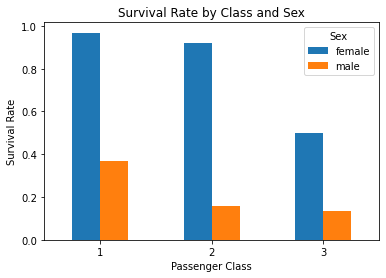

In [61]:
df_sex_class_survival = df.pivot_table('Survived',index="Sex", columns='Pclass')
ax = df_sex_class_survival.T.plot(kind='bar')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.xticks(rotation=0)
plt.title('Survival Rate by Class and Sex')
plt.show()

# On your own now! 

Answer the next four questions on your own.

## Q1 - What was the mean age of the male passengers in Pclass 1?

In [80]:
# did not include for pclass
mean_male_age = df[df['Sex'] == 'male'].mean()
mean_male_age.Age

30.72664459161148

## Q2 - What was the mean Fare by Pclass?

In [82]:
mean_fare_by_Pclass = df.groupby('Pclass')['Fare'].mean()
mean_fare_by_Pclass

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

## Q3 - How many females under the age of 13 were there?

In [94]:
count_females = df[(df['Sex']=='female') & (df['Age'] < 13)]
count_females['Sex'].value_counts()

female    32
Name: Sex, dtype: int64

## React in Slack to the poll when you are done with each of the Vizualizations

## Viz One - Plot a Histogram of the Ages of all the Passengers
See the documentation [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.hist.html). 
<br>You can control the plot with matplotlib's functions, like `grid`, `xlabel`, `ylabel`, and `title`
<br> Use 20 equally spaced bins for your histogram. 

Apply labels and remove plot grid lines.  

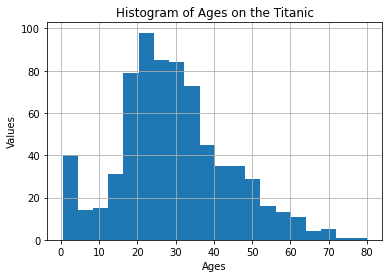

In [155]:
plt.hist(df['Age'],bins=20)
plt.ylabel('Values')
plt.xlabel('Ages')
plt.title('Histogram of Ages on the Titanic')
plt.grid()
plt.show()

##  Viz Two - Line Bar Chart showing the distribution of Passenger Classes
Use three overlapping line charts (chart type is .plot(kind="kde") to show the distribution of "pclass".<br>
Note: Add labels, and rotate the xticks to be more readable.

Text(0, 0.5, '')

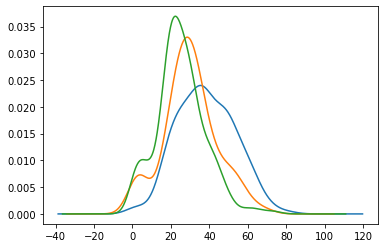

In [165]:
for x in [1,2,3]:
    df.Age[df['Pclass'] == x].plot(kind="kde")
plt.title("")
plt.xlabel("")
plt.ylabel("")

##  Viz Three - Plot a ScatterPlot with the fare paid by the Titanic passengers and their age.
This time, let's see the amount of money that different ages were buying fares at using a scatterplot. <br>
Things to keep in mind:
<li>
    Try using 'titanic_scatter.set_xlim()' and giving your scatterplot dots a size (s=#)
</li>
<li>
    Name your Axis
</li>

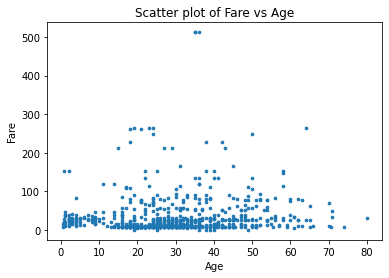

In [159]:
plt.scatter(df['Age'],df['Fare'],s=7)
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title('Scatter plot of Fare vs Age')
plt.show()


# Great Job!